# #importing csv file

In [1]:
import pandas as pd

In [2]:
AnimeList  = pd.read_csv("AnimeList.csv")

## displaing data file 

In [3]:
AnimeList.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites
count,14478.000000,14478.000000,14478.000000,1.447800e+04,12904.000000,14478.000000,1.447800e+04,14478.000000
mean,17377.229866,11.308399,6.142482,1.146003e+04,6439.065406,7220.259566,2.296640e+04,311.649606
std,13165.315011,43.443451,1.463981,4.310519e+04,3720.227608,4170.080564,7.498136e+04,2615.554211
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,4389.250000,1.000000,5.550000,4.600000e+01,3216.250000,3611.500000,2.450000e+02,0.000000
50%,15135.000000,1.000000,6.370000,5.010000e+02,6441.500000,7225.500000,1.679500e+03,2.000000
75%,31146.500000,12.000000,7.060000,3.941500e+03,9664.000000,10827.750000,1.037900e+04,23.000000
max,37916.000000,1818.000000,10.000000,1.009477e+06,12919.000000,14487.000000,1.456378e+06,106895.000000


# removing unwanted attributes

In [4]:
AnimeList=AnimeList.drop(["title_english","title_japanese","title_synonyms","source","premiered","related","producer","licensor","studio","opening_theme","ending_theme","aired","broadcast"],axis=1)

In [5]:
# renaming score by rating and rating by age restriction for simplicity

AnimeList.rename(columns = {"rating":"age_restriction","score":"rating","scored_by":"rating_by"},inplace = True)

In [6]:
#calculating  empty genera set
AnimeList['genre'].isnull().sum()

64

In [7]:
#filling it with none values
AnimeList.loc[AnimeList['genre'].isnull(), 'genre'] = "none"
AnimeList['genre'].isnull().any()

False

In [8]:
#calculate empty rating
AnimeList['rating'].isnull().sum()

0

# checking all possible age_restriction anime and remove rx rated anime

In [9]:
AnimeList.age_restriction.unique()

array(['PG-13 - Teens 13 or older', 'PG - Children', 'G - All Ages',
       'R+ - Mild Nudity', 'R - 17+ (violence & profanity)',
       'Rx - Hentai', 'None'], dtype=object)

In [10]:
AnimeList.drop(AnimeList[AnimeList.age_restriction =="Rx - Hentai"].index, inplace=True)

In [11]:
# all anime with rx-rated are removed
AnimeList.age_restriction.unique()

array(['PG-13 - Teens 13 or older', 'PG - Children', 'G - All Ages',
       'R+ - Mild Nudity', 'R - 17+ (violence & profanity)', 'None'],
      dtype=object)

In [12]:
AnimeList.head()

,anime_id,title,image_url,type,episodes,status,airing,aired_string,duration,age_restriction,rating,rating_by,rank,popularity,members,favorites,background,genre
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,TV,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,TV,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,https://myanimelist.cdn-dena.com/images/anime/...,TV,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,"Comedy, Drama, Romance, Shounen"


In [13]:
AnimeList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13259 entries, 0 to 14477
Data columns (total 18 columns):
anime_id           13259 non-null int64
title              13259 non-null object
image_url          13164 non-null object
type               13259 non-null object
episodes           13259 non-null int64
status             13259 non-null object
airing             13259 non-null bool
aired_string       13259 non-null object
duration           13259 non-null object
age_restriction    13259 non-null object
rating             13259 non-null float64
rating_by          13259 non-null int64
rank               12902 non-null float64
popularity         13259 non-null int64
members            13259 non-null int64
favorites          13259 non-null int64
background         1043 non-null object
genre              13259 non-null object
dtypes: bool(1), float64(2), int64(6), object(9)
memory usage: 1.8+ MB


# Data visulization


In [14]:
# %matplotlib inline used when we want our data  visulization here it self

import matplotlib.pyplot as plt
%matplotlib inline

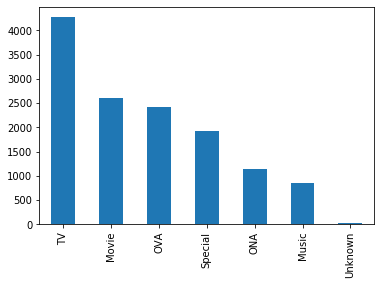

In [15]:
AnimeList['type'].value_counts().plot.bar()

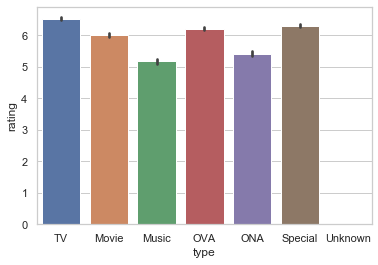

In [16]:
import seaborn as sns
sns.set(style ="whitegrid") 
ax = sns.barplot(x = 'type', y = 'rating', data = AnimeList) 

In [17]:
missing=AnimeList.loc[(AnimeList['type']=="Unknown")].head()
missing.shape

(5, 18)

In [18]:
missing.head(5)

,anime_id,title,image_url,type,episodes,status,airing,aired_string,duration,age_restriction,rating,rating_by,rank,popularity,members,favorites,background,genre
187,35759,Sidonia no Kishi 3,https://myanimelist.cdn-dena.com/images/anime/...,Unknown,0,Not yet aired,False,Not available,24 min.,R - 17+ (violence & profanity),0.0,0,NaN,4601,5801,24,NaN,"Action, Sci-Fi, Space, Mecha, Seinen"
511,37651,Fate/Extra: Last Encore - Irusterias Tendouron,https://myanimelist.cdn-dena.com/images/anime/...,Unknown,0,Not yet aired,False,"Jul, 2018 to ?",Unknown,R - 17+ (violence & profanity),0.0,1,NaN,4461,6265,4,NaN,"Action, Magic, Fantasy"
1396,35252,Hatena☆Illusion,https://myanimelist.cdn-dena.com/images/anime/...,Unknown,0,Not yet aired,False,Not available,Unknown,None,0.0,0,NaN,7242,1674,1,NaN,"Comedy, Supernatural, Romance, Ecchi"
1989,36407,Kenja no Mago,https://myanimelist.cdn-dena.com/images/anime/...,Unknown,0,Not yet aired,False,Not available,Unknown,None,0.0,1,NaN,6019,2925,8,NaN,"Action, Comedy, Magic, Fantasy"
2326,34649,Soukyuu no Fafner: Dead Aggressor - The Beyond,https://myanimelist.cdn-dena.com/images/anime/...,Unknown,0,Not yet aired,False,Not available,Unknown,PG-13 - Teens 13 or older,0.0,0,NaN,6674,2177,2,NaN,"Action, Military, Sci-Fi, Drama, Mecha"


In [19]:
AnimeList.drop(AnimeList[AnimeList.type =="Unknown"].index, inplace=True)
missing=AnimeList.loc[(AnimeList['type']=="Unknown")].head()
missing.shape

(0, 18)

# # data is splitting into traing and testing

In [20]:
# using skitlearn 
from sklearn.model_selection import train_test_split

#ratio is 80 and 20 and radom seed is 42

anime_train_set, anime_test_set = train_test_split(AnimeList, test_size= 0.2, random_state= 42)

In [21]:
print(f"rows in train set:{len(anime_train_set)}\nrow in test set:{len(anime_test_set)}\n")

rows in train set:10583
row in test set:2646



# Bulding genera based recommendation 

In [22]:
m = anime_train_set.members.quantile(0.75)
C = anime_train_set.rating.mean()
print(m, C)

12323.0 6.146585089294171


In [23]:
def weighted_rating(df, m, C):
    term = df['members'] / (m + df['members'])
    return df['rating'] * term + (1-term) * C

In [24]:
anime_train_set_set['community_rating'] = df.apply(weighted_rating, axis=1, args=(m,C))
anime_train_set.head()

NameError: name 'df' is not defined